# Project : FutureScore 

### 1. Problem Statement:
- This project understands how the students performance is affected by other variables such as gender, Ethinicity, Parental Level of education , lunch and Test preparation course.

### 2. Data Collection:
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.


#### Import Data and Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("data/stud.csv")

In [4]:
# Showing Top 5 Records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Shape of the Data
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


####  Dataset Information
1. gender : Male/Female
2. race/ethnicity : Ethinicity of students -> ( Group A,B,C,D,E)
3. paretal level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
4. lunch : having lunch before test (standard or free/reduced)
5. test preparation course : complete or not complete before test
6. math score
7. reading score
8. writing score


#### Data Checks to Perform
- check Missing values
- check duplicates
- check data type
- check the number of unique values of each column
- check statistics of data
- check various categories present in different categorical columns.

In [9]:
# checking for missing values.
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no Missing values in the dataset

In [10]:
# Checking for Duplicate values.
df.duplicated().sum()

np.int64(0)

#### There are no Duplicated values in the dataset.

In [12]:
# Checking no of unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
# Checking the statistics of the dataset.
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights
- From above description of numerical data, all means are very close to each other - between 66 and 68.05.
- All standard deviations are also close - between 14.6 and 15.19.
- While there is a minimum score of 0 for math, for writing minimum is much higher = 10 and for reading  higher = 17

#### Exploring The data

In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [20]:
cat_features = [feature for feature in df.columns if df[feature].dtype == "O"]
num_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [21]:
for feature in cat_features: 
    print(f"Categories in {feature} variable :{df[feature].unique()}")

Categories in gender variable :['female' 'male']
Categories in race_ethnicity variable :['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable :["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable :['standard' 'free/reduced']
Categories in test_preparation_course variable :['none' 'completed']


#### Feature Engineerin

- Adding Columns "Total Score" and "Average"

In [22]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average"] = df["total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [25]:
subjects = ["math_score","reading_score","writing_score"]
for subject in subjects:
    full_count = df[df[subject] == 100]["average"].count()
    less_20 = df[df[subject] <=20]["average"].count()
    greater_80 = df[df[subject]>=80]["average"].count()
    print(f"Number of students with full marks in {subject} :{full_count}")
    print(f"Number of students with less than 20 marks in {subject}:{less_20}")
    print(f"Number of students with greater than 80 Marks in {subject}: {greater_80}")

Number of students with full marks in math_score :7
Number of students with less than 20 marks in math_score:4
Number of students with greater than 80 Marks in math_score: 193
Number of students with full marks in reading_score :17
Number of students with less than 20 marks in reading_score:1
Number of students with greater than 80 Marks in reading_score: 249
Number of students with full marks in writing_score :14
Number of students with less than 20 marks in writing_score:3
Number of students with greater than 80 Marks in writing_score: 235


#### Visualization


In [26]:
# Visualizing Average Score Distribution
# 1. Histogram
# 2. Kernel Distribution Function (KDE)

##### Histogram and KDE

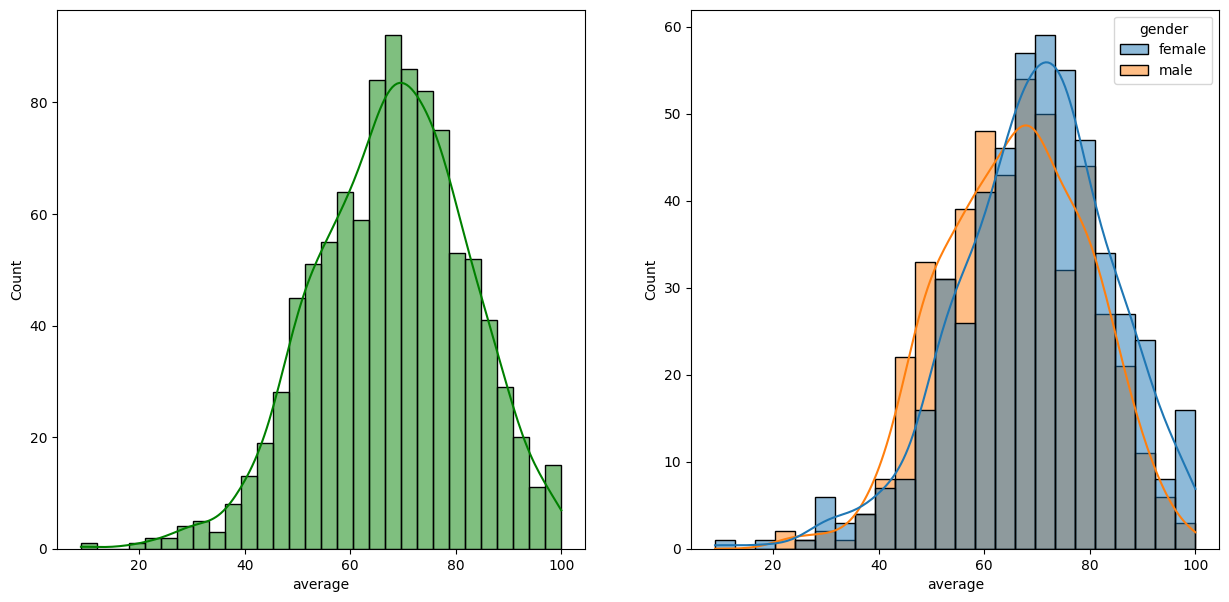

In [30]:
fig,axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x="average",bins = 30, kde=True,color ="g")
plt.subplot(122)
sns.histplot(data=df,x="average",kde=True,hue="gender")
plt.show()

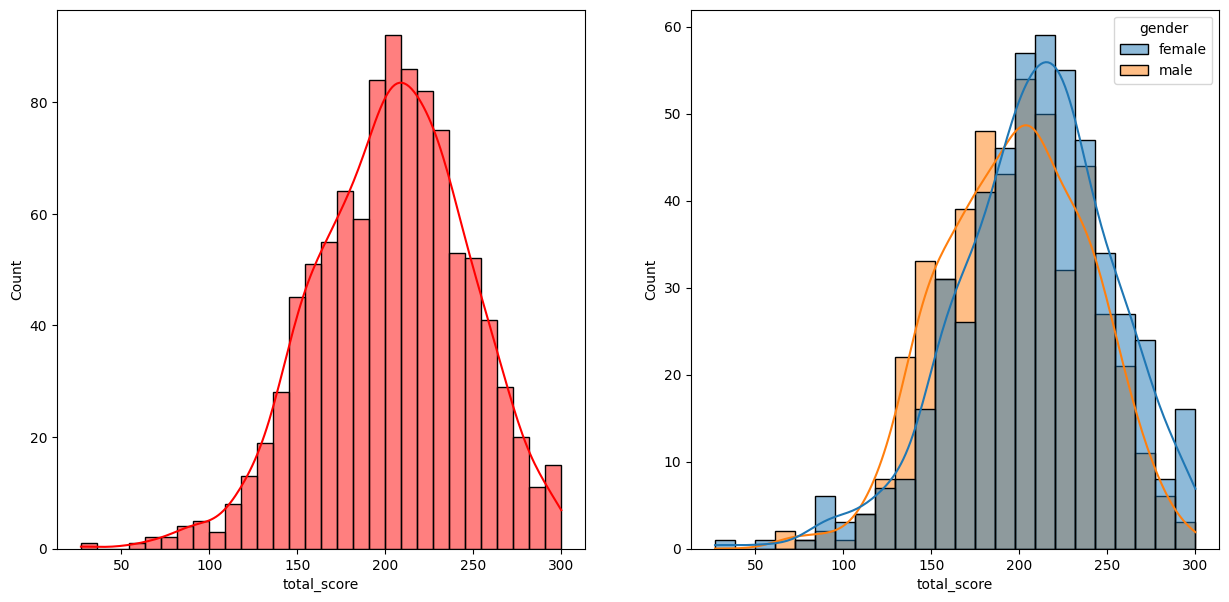

In [32]:
# Histplot and kde for total score
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df , x="total_score", bins=30,kde=True,color="r")
plt.subplot(122)
sns.histplot(data=df,x="total_score",kde=True,hue="gender")
plt.show()

##### Insights:
- Female students tend to perform will then male students.

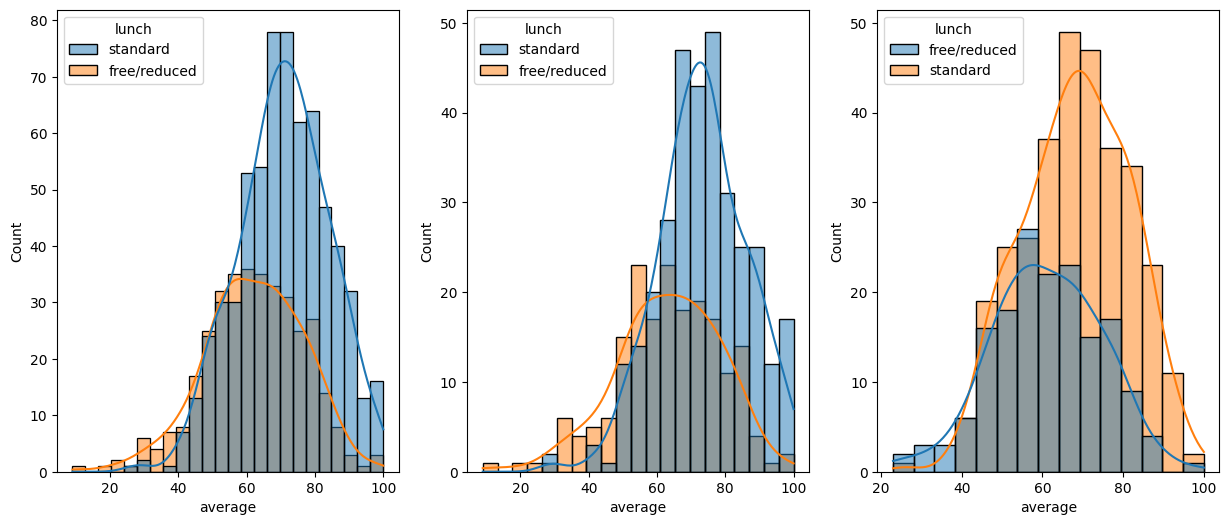

In [34]:
plt.subplots(1,3,figsize = (15,6))
plt.subplot(131)
sns.histplot(data=df,x="average",kde=True,hue="lunch")
plt.subplot(132)
sns.histplot(data= df[df.gender == "female"],x="average",kde=True,hue="lunch")
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x="average",kde=True,hue="lunch")
plt.show()

##### Insights : 
- Standard Lunch helps to perform well in exams for both male and female.

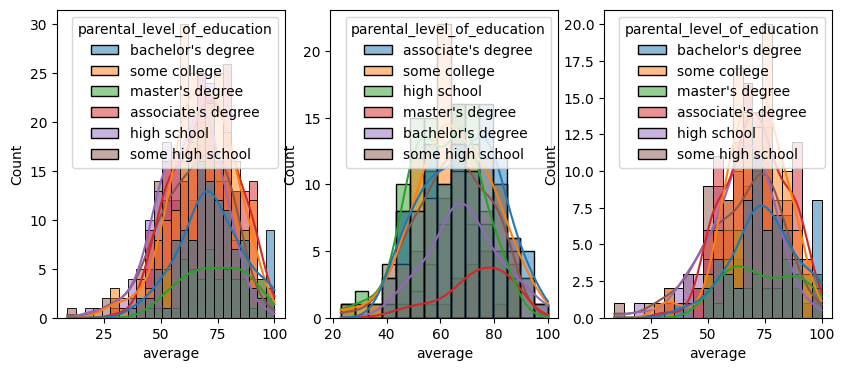

In [41]:
plt.subplots(1,3,figsize=(10,4))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

##### Insights
- In General parent's education don't help students perform well in exam.
- 2nd Plot shows that parent's whose education is associate's degree or master's degree their male child tend to perform well in exams.
- 3rd plot shows that there is no effect of parent's education on female students.

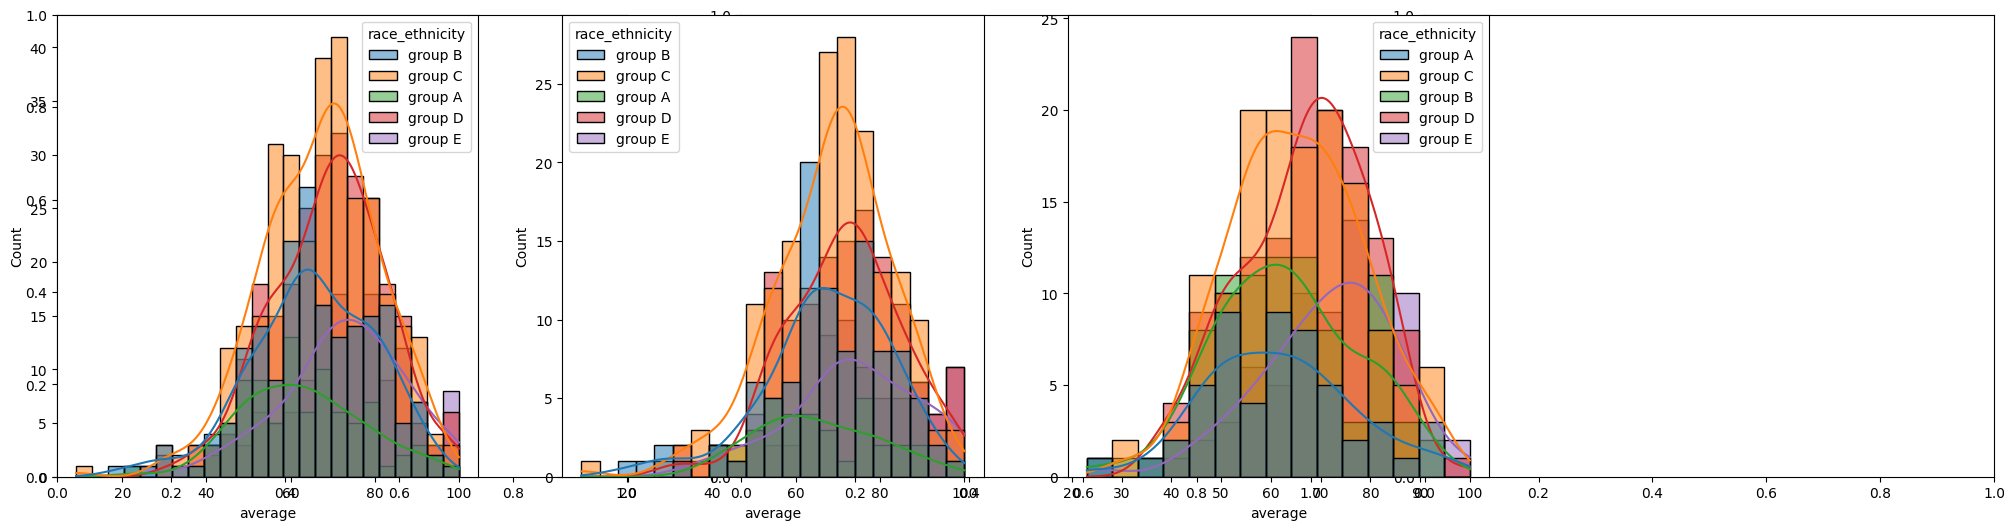

In [43]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

##### Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.


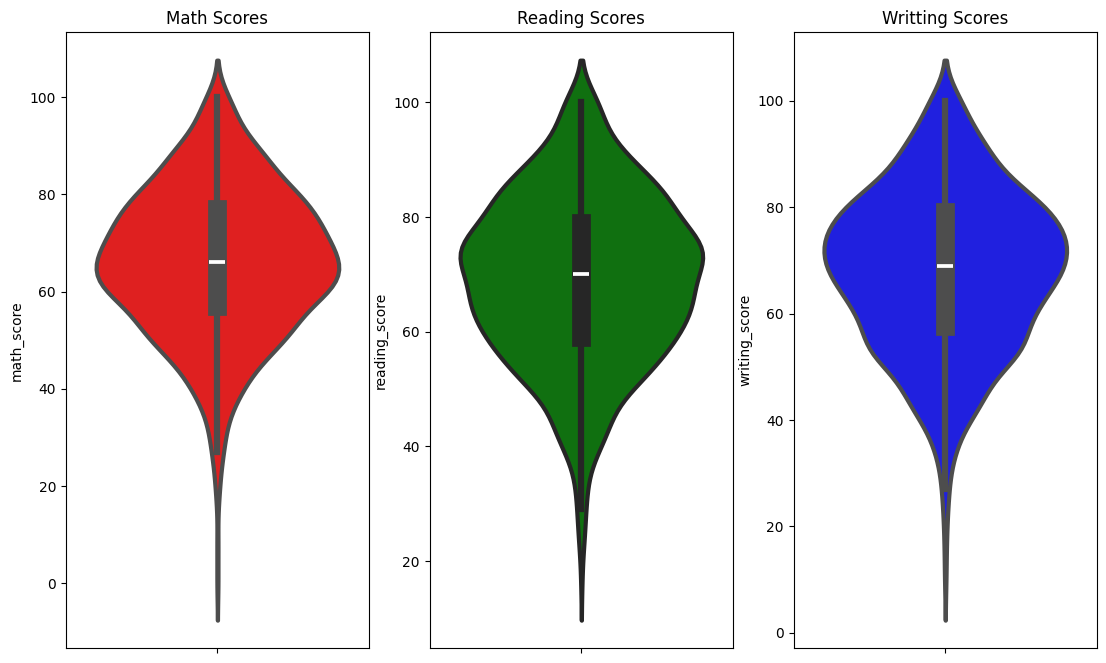

In [47]:
# Maximum Score of students in all three subjects
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y="math_score",data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title("Reading Scores")
sns.violinplot(y="reading_score",data=df , color="green",linewidth=3)
plt.subplot(1,4,3)
plt.title("Writting Scores")
sns.violinplot(y="writing_score",data = df, color="blue",linewidth=3)
plt.show()

##### Insights:
- From the above three plots it is cleary visible that most of the students score in between 60-80 in maths whereas in readin and writing most of them score form 50-80

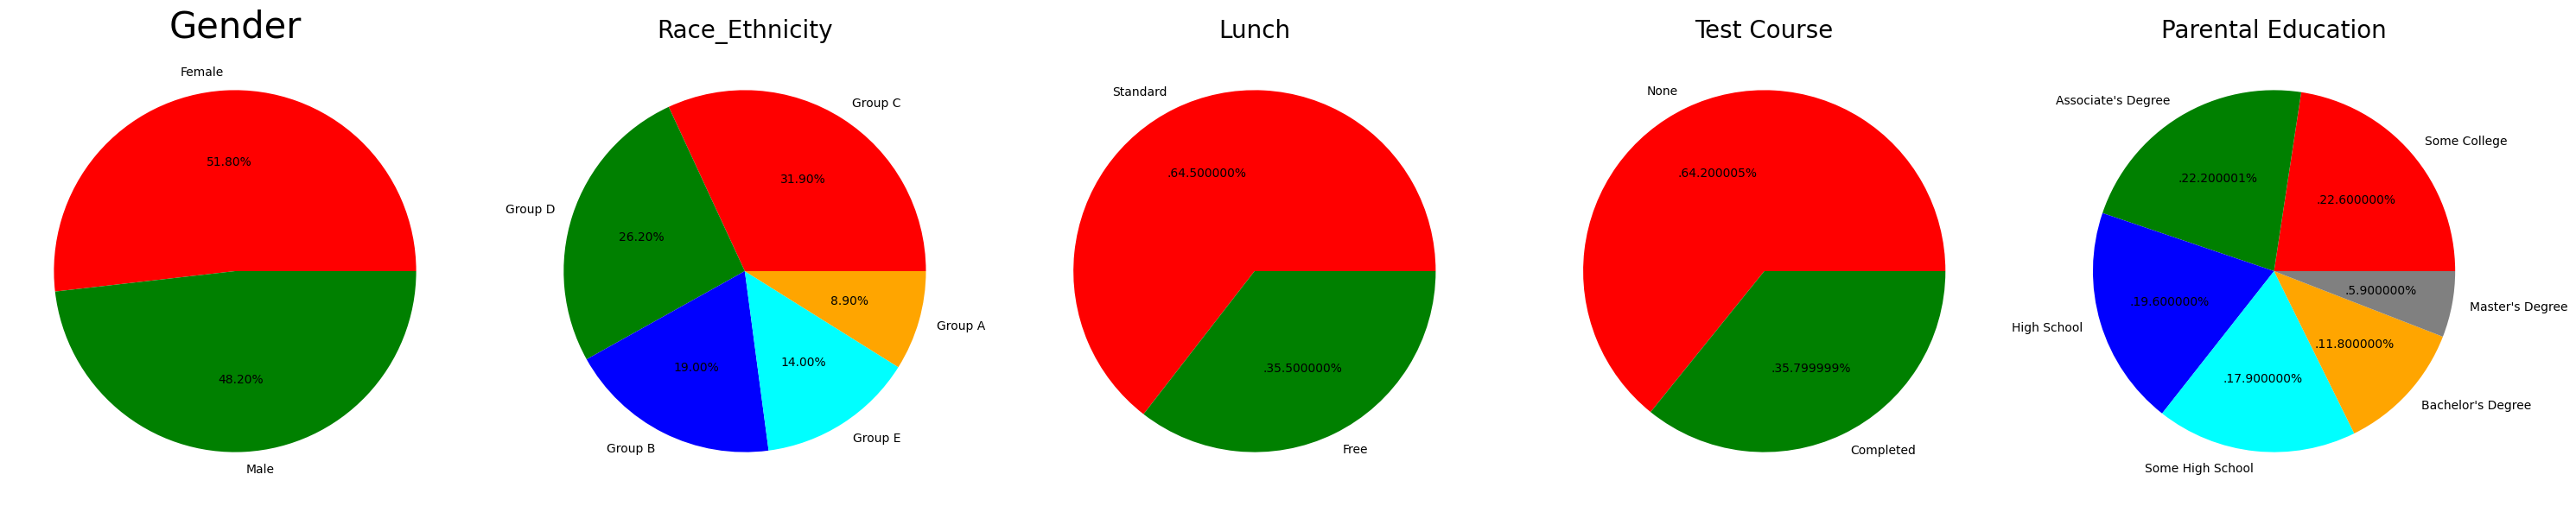

In [56]:
# Multivariant Analysis Using Pieplot
plt.rcParams["figure.figsize"]=(30,12)
plt.subplot(1,5,1)
size = df["gender"].value_counts()
labels = ["Female","Male"]
color = ["red","green"]

plt.pie(size,colors=color,labels=labels, autopct="%.2f%%")
plt.title("Gender",fontsize=30)
plt.axis("off")

plt.subplot(1,5,2)
size= df["race_ethnicity"].value_counts()
labels=['Group C',"Group D","Group B","Group E", "Group A"]
color=["red","green","blue","cyan","orange"]
plt.pie(size,colors=color,labels=labels,autopct="%.2f%%")
plt.title("Race_Ethnicity",fontsize=20)
plt.axis("off")

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()



###### Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

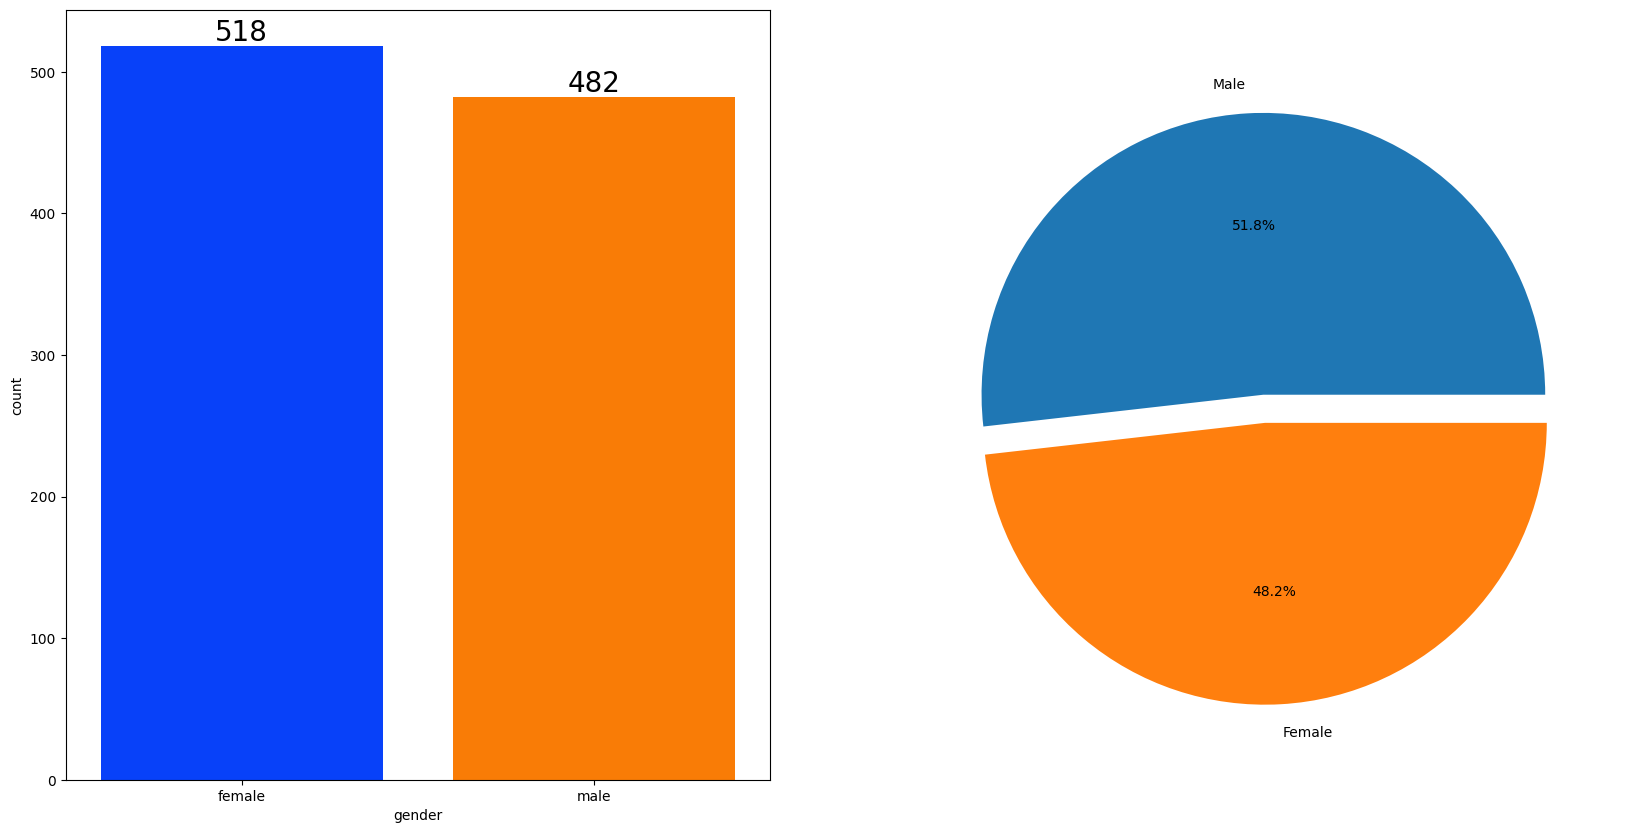

In [58]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df.gender,data=df,palette="bright",ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=20)
plt.pie(x=df["gender"].value_counts(),labels=["Male","Female"],explode=[0,0.1],autopct="%.1f%%")
plt.show()

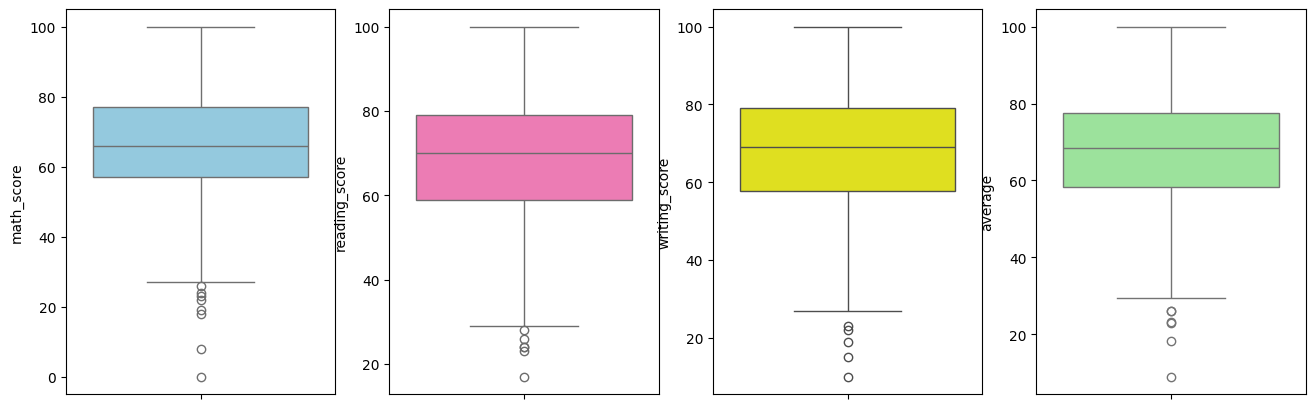

In [63]:

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

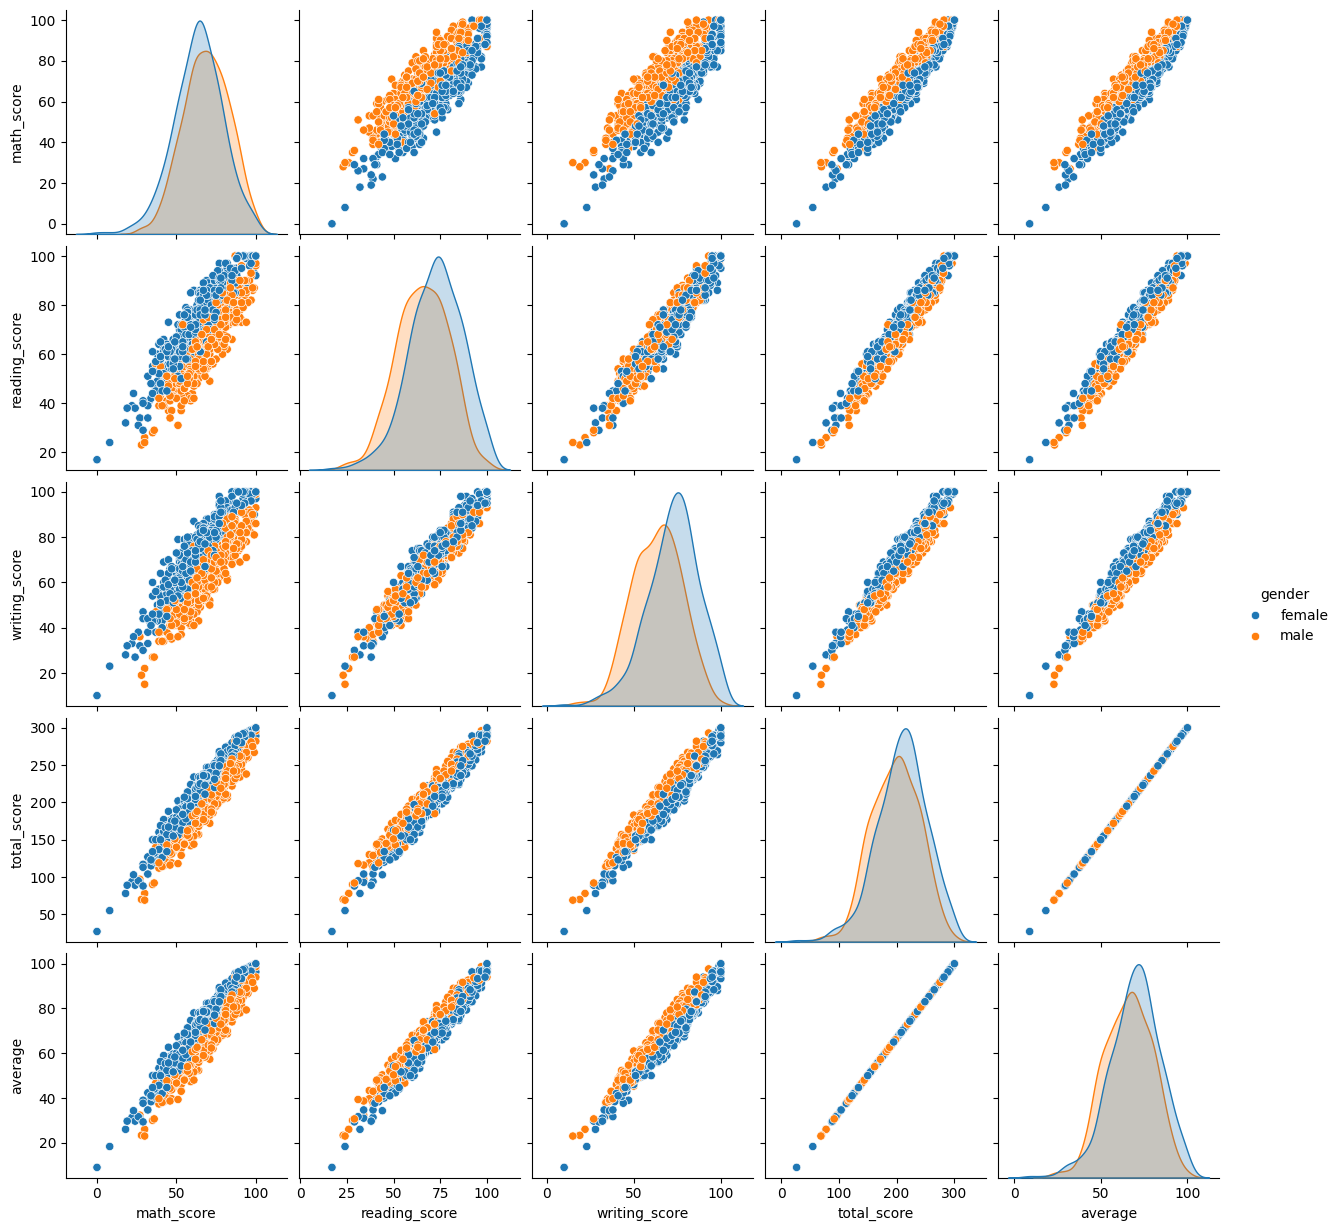

In [64]:

sns.pairplot(df,hue = 'gender')
plt.show()

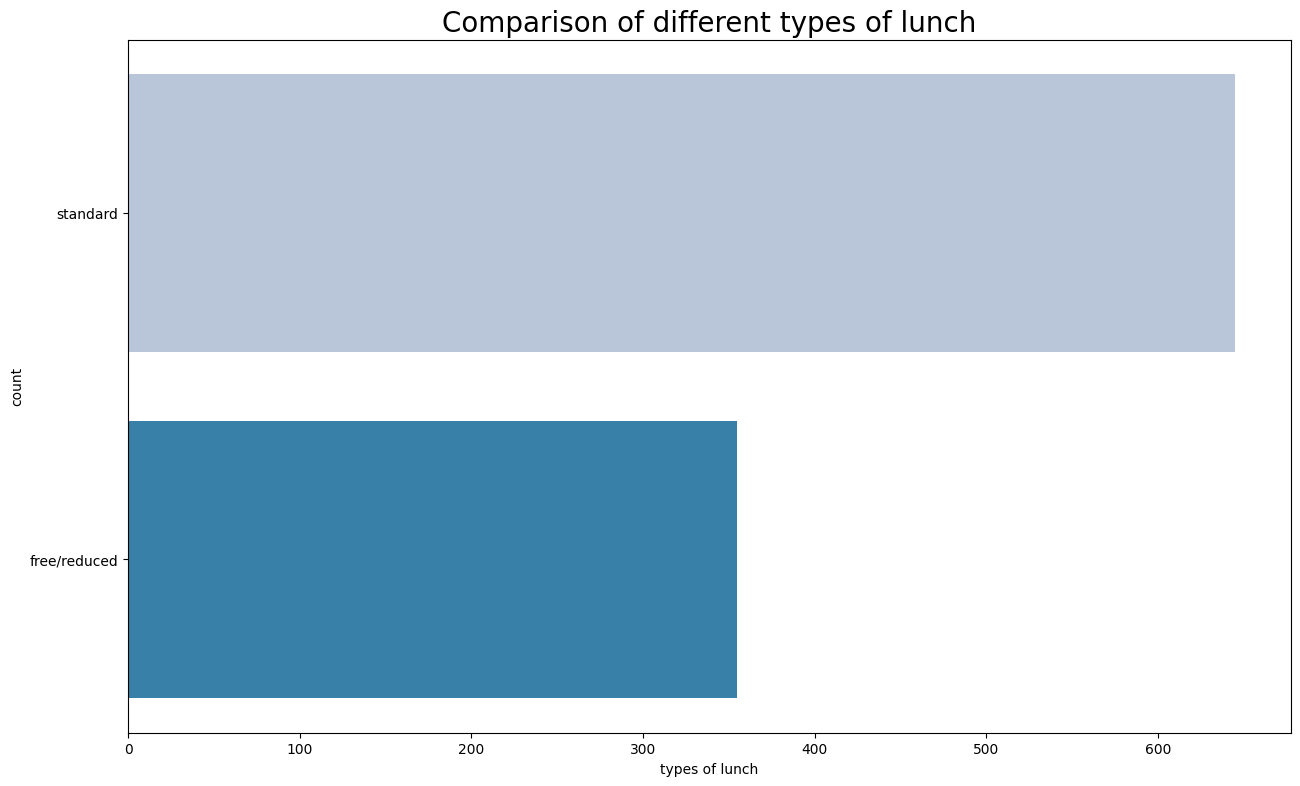

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

##### Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial